In [7]:
### This is about simulating a great number of times the Velib trafic in Rouen
import Distributions
using Distributions
import PyPlot
using PyPlot
srand(123);

In [8]:
#General Data
T = 120 #horizon
n = 5 #number of stations : 3-7
dist_matrix = 1./[0 3 5 7 7;
               2 0 2 5 5;
               4 2 0 3 3;
               8 6 4 0 2;
               7 7 5 2 0]; #distance between stations
terminal_number = [24 20 20 15 20]; #number of terminals at each station
routing_matrix = [0 0.2 0.3 0.2 0.3;
                  0.2 0 0.3 0.2 0.3;
                  0.2 0.25 0 0.25 0.3;
                  0.15 0.2 0.3 0 0.35;
                  0.2 0.25 0.35 0.2 0]; #routing matrix ?
leaving_per_min = [2.8 3.7 5.5 3.5 4.6]/60; #mean number of bikes leaving each station per minute
leaving_per_hour = leaving_per_min;
alpha = 1;
N_bikes = convert(Integer, 91); #total number of bikes
N_stations = convert(Integer, 5); #number of stations

In [14]:
#Initial data
X0 = [20 1 0 0 0;
     1 15 1 0 0;
     0 1 17 1 0;
     0 0 1 13 1;
     0 0 0 1 18];

In [107]:
function get_event(v, P)
    i0 = 1; j0 = 1; s = 0;
    for i in range(1, N_stations)
        for j in range(1, N_stations)
            s = s + P[i,j];
            if P[i,j] != 0
                println(s)
                #if v > s
                #    println(i, " ", j)
                #    i0 = i; j0 = j;
                #else
                #   return [i0, j0];
                #end
                if v< s
                    i0 = i; j0 = j;
                    return [i0, j0];
                end
            end
        end
    end
    return [i0, j0]
end

get_event (generic function with 1 method)

In [110]:
function simulate(T)
    #define distributions
    c = Uniform();
    route = [Categorical(routing_matrix[i, :]) for i in range(1, N_stations)]; #TO BE CHANGED
    #time
    t = 0;
    #state
    X = copy(X0);
    #number of problems
    result = 0;
    while (t < T)
        #********************************************************************
        #Get the parameter of the stay time Exponential 
        #get also the vector with probabilities of each event p
        lambda = 0;
        p = zeros(N_stations,N_stations);
        for i in range(1, N_stations)
            for j in range(1, N_stations)
                if i != j
                    lambda = lambda + X[i,j]*dist_matrix[i,j];
                    p[i,j] = X[i,j]*dist_matrix[i,j];
                    #println(X[i,j])
                else
                    lambda = lambda + alpha * leaving_per_hour[i];
                    p[i,j] = alpha * leaving_per_hour[i];
                end
                
                #println(i, " , ", j ," , " ,lambda)
            end
        end
        p = p./lambda;
        for i in range(1,N_stations)
            println(p[i,:])
        end
        
        #*****************************************************************
        #Draw the time to stay
        println("lambda ", lambda)
        exp = Exponential(1/lambda);
        dt = rand(exp);
        #println(dt)
        t = t + dt;
        
        #*****************************************************************
        #draw event and realise it
        cat = rand(c);
        println(" cat ", cat)
        for i in range(1,N_stations)
            println(X[i,:])
        end
        A = get_event(cat, p); i = A[1]; j = A[2];
        #println("i ", i, " j ", j)
        #println(p[i,j])
        #if i == j it is a departure. Else it is an arrival.
        if i == j
            #if there is no bike available
            if X[i,j] == 0
                result = result + 1;
                println("error departure " , i)
            else
                X[i,j] = X[i,j] - 1;
                destination = rand(route[i]);
                X[i, destination] = X[i, destination] + 1;
            end
            println("departure ", i , " to ", destination, ", temps " , t);
        else #it is an arrival
            #if no terminal is available
            if X[j,j] == terminal_number[j]
                result = result + 1;
                println("error arrival " , j)
                X[i,j] = X[i,j] - 1;
                destination = rand(route[j]);
                X[j, destination] = X[j, destination] + 1;
            else
                X[i,j] = X[i,j] - 1;
                X[j,j] = X[j,j] + 1;
                println("arrival ", j, " from ", i,  " temps" , t);
            end
        end
    end
    
    for i in range(1,N_stations)
        println(X[i,:])
    end
    
    return result
end

simulate (generic function with 1 method)

In [111]:
simulate(120)

[0.0124389,0.0888494,0.0,0.0,0.0]
[0.133274,0.0164371,0.133274,0.0,0.0]
[0.0,0.133274,0.0244336,0.0888494,0.0]
[0.0,0.0,0.0666371,0.0155486,0.133274]
[0.0,0.0,0.0,0.133274,0.0204354]
lambda 3.7516666666666665
 cat 0.1588204084968714
[20,1,0,0,0]
[1,15,1,0,0]
[0,1,17,1,0]
[0,0,1,13,1]
[0,0,0,1,18]
0.012438916037316748
0.10128831630386495
0.23456241670368727
arrival 1 from 2 temps0.10162198378948377
[0.0143516,0.102512,0.0,0.0,0.0]
[0.0,0.0189646,0.153767,0.0,0.0]
[0.0,0.153767,0.0281907,0.102512,0.0]
[0.0,0.0,0.0768836,0.0179395,0.153767]
[0.0,0.0,0.0,0.153767,0.0235777]
lambda 3.251666666666666
 cat 0.7931839216664764
[21,1,0,0,0]
[0,15,1,0,0]
[0,1,17,1,0]
[0,0,1,13,1]
[0,0,0,1,18]
0.014351614556637624
0.11686314710404923
0.13582778062532036
0.28959507944643775
0.44336237826755515
0.4715530497180933
0.5740645822655049
0.6509482316760636
0.6688877498718606
0.822655048692978
arrival 5 from 4 temps0.5438257521858046
[0.0169594,0.121139,0.0,0.0,0.0]
[0.0,0.0224107,0.181708,0.0,0.0]
[0.0,0.

[1,1,0,12,0]
[0,0,0,0,18]
0.06064356435643564
0.24628712871287128
0.32642326732673266
0.4455445544554455
departure 3 to 5, temps 24.240015118009552
[0.0423143,0.0,0.0,0.0,0.129534]
[0.0,0.0559154,0.0,0.0,0.0]
[0.0,0.0,0.0831174,0.0,0.302245]
[0.113342,0.151123,0.0,0.0528929,0.0]
[0.0,0.0,0.0,0.0,0.0695164]
lambda 1.1028571428571428
 cat 0.6865180573160523
[19,0,0,0,1]
[0,20,0,0,0]
[0,0,18,0,1]
[1,1,0,12,0]
[0,0,0,0,18]
0.04231433506044905
0.17184801381692574
0.22776338514680486
0.31088082901554404
0.613126079447323
0.7264680483592401
arrival 1 from 4 temps25.31900097713562
[0.0477234,0.0,0.0,0.0,0.146092]
[0.0,0.0630631,0.0,0.0,0.0]
[0.0,0.0,0.0937424,0.0,0.340881]
[0.0,0.170441,0.0,0.0596542,0.0]
[0.0,0.0,0.0,0.0,0.0784027]
lambda 0.9778571428571429
 cat 0.4114968799673535
[20,0,0,0,1]
[0,20,0,0,0]
[0,0,18,0,1]
[0,1,0,12,0]
[0,0,0,0,18]
0.04772339907475042
0.1938154370586803
0.25687850012174335
0.3506208911614317
0.6915023131239347
arrival 5 from 3 temps25.548757472636034
[0.0724049,0

[0.0,0.0,0.343474,0.0801439,0.0]
[0.0,0.196271,0.0,0.0,0.105332]
lambda 0.7278571428571428
 cat 0.9457429416332284
[21,0,0,0,0]
[0,20,0,0,0]
[0,0,15,0,0]
[0,0,1,13,0]
[0,1,0,0,20]
0.0641151455675499
0.14883873078181226
0.27477919528949957
0.6182531894013741
0.6983971213608114
0.8946679751390254
1.0000000000000002
departure 5 to 2, temps 48.94740212676019
[0.0535958,0.0,0.0,0.0,0.0]
[0.0,0.0708231,0.0,0.0,0.0]
[0.0,0.0,0.105278,0.0,0.0]
[0.0,0.0,0.287121,0.0669948,0.0]
[0.0,0.328138,0.0,0.0,0.0880503]
lambda 0.8707142857142857
 cat 0.4773856310561193
[21,0,0,0,0]
[0,20,0,0,0]
[0,0,15,0,0]
[0,0,1,13,0]
[0,2,0,0,19]
0.05359584358764014
0.12441892261416462
0.22969647251845776
0.51681706316653
arrival 3 from 4 temps52.507853037564715
[0.0751822,0.0,0.0,0.0,0.0]
[0.0,0.0993479,0.0,0.0,0.0]
[0.0,0.0,0.147679,0.0,0.0]
[0.0,0.0,0.0,0.0939778,0.0]
[0.0,0.460299,0.0,0.0,0.123514]
lambda 0.6207142857142858
 cat 0.888625878644342
[21,0,0,0,0]
[0,20,0,0,0]
[0,0,16,0,0]
[0,0,0,13,0]
[0,2,0,0,19]
0.07

0.8556149732620321
0.9180035650623886
1.0
departure 5 to 3, temps 70.52233308650703
[0.041116,0.0,0.176211,0.0,0.0]
[0.0,0.0543319,0.0,0.176211,0.176211]
[0.0,0.0,0.0807636,0.0,0.0]
[0.0,0.0,0.0,0.051395,0.0]
[0.0,0.0,0.176211,0.0,0.0675477]
lambda 1.135
 cat 0.17033124580557502
[21,0,1,0,0]
[0,20,0,1,1]
[0,0,17,0,0]
[0,0,0,14,0]
[0,0,1,0,15]
0.04111600587371512
0.2173274596182085
arrival 3 from 1 temps70.84113038590729
[0.0499109,0.0,0.0,0.0,0.0]
[0.0,0.0659537,0.0,0.213904,0.213904]
[0.0,0.0,0.0980392,0.0,0.0]
[0.0,0.0,0.0,0.0623886,0.0]
[0.0,0.0,0.213904,0.0,0.0819964]
lambda 0.935
 cat 0.6240968188698248
[21,0,0,0,0]
[0,20,0,1,1]
[0,0,18,0,0]
[0,0,0,14,0]
[0,0,1,0,15]
0.0499108734402852
0.1158645276292335
0.3297682709447415
0.5436720142602495
0.641711229946524
departure 3 to 1, temps 72.19313075334857
[0.0393812,0.0,0.0,0.0,0.0]
[0.0,0.0520394,0.0,0.168776,0.168776]
[0.21097,0.0,0.0773558,0.0,0.0]
[0.0,0.0,0.0,0.0492264,0.0]
[0.0,0.0,0.168776,0.0,0.0646976]
lambda 1.185
 cat 0.1876

12

In [36]:
d=Exponential(10)
println(rand(d))

13.317184025341287


In [7]:
results = zeros(200)
for t in range(1,200)
    results[t] = simulate(T)
end
println(results)
println("mean value ", mean(results))
println("max value ", maximum(results))

[0.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,3.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,0.0,1.0,0.0,3.0,3.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,3.0,4.0,0.0,2.0,1.0,2.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0]
mean value 1.16
max value 4.0


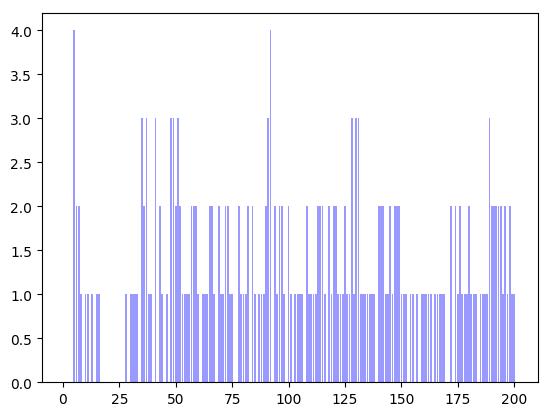

(PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c51b10>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c51890>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c51e50>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c62250>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c62590>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c62910>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c62c90>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c62f90>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c6f3d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c6f750>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c6fad0>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8c6fe50>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8bfc210>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8bfc590>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c8bfc910>,PyObject <matplotlib.pat

In [8]:
bar(range(1, 200), results, color="blue",align="center",alpha=0.4)

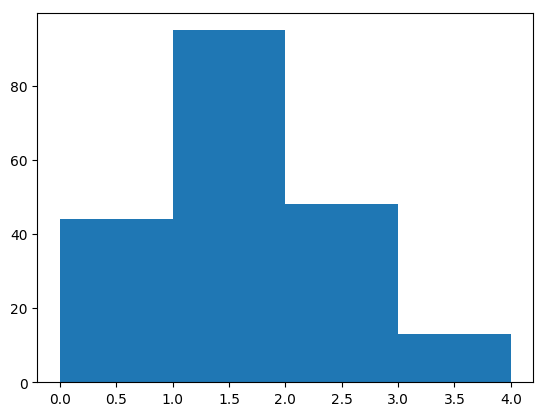

([44.0,95.0,48.0,13.0],[0.0,1.0,2.0,3.0,4.0],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f76c0a09790>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c0a09510>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c0a09a90>,PyObject <matplotlib.patches.Rectangle object at 0x7f76c0a09dd0>])

In [9]:
h = plt[:hist](results,4) # Histogram
#gcf() # Needed for IJulia to plot inline